In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fruit_data_with_colors.txt', delimiter = '\t')
data = df.drop(['fruit_label', 'fruit_name', 'fruit_subtype'], axis=1)

<AxesSubplot:xlabel='width', ylabel='height'>

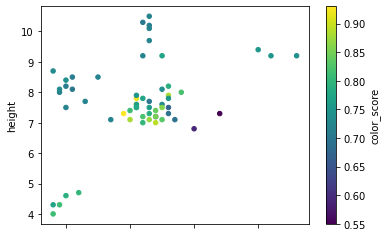

In [3]:
data.plot.scatter(
    y = 'height',
    x = 'width',
    c = 'color_score',
    colormap = 'viridis'
)

In [4]:
k = 6 # Since there seem to be around 5-6 groups
centroids = data.sample(k).sort_index(axis = 0)
centroids['cluster_index'] = range(1, k + 1)
centroids = centroids.set_index('cluster_index')
centroids

mass  width  height  color_score
cluster_index                                  
1                84    6.0     4.6         0.79
2               154    7.0     7.1         0.88
3               168    7.5     7.6         0.73
4               150    7.1     7.9         0.75
5               154    7.3     7.3         0.79
6               118    6.1     8.1         0.70

In [5]:
data.insert(4, 'cluster_index', np.nan)
data.head()

mass  width  height  color_score  cluster_index
0   192    8.4     7.3         0.55            NaN
1   180    8.0     6.8         0.59            NaN
2   176    7.4     7.2         0.60            NaN
3    86    6.2     4.7         0.80            NaN
4    84    6.0     4.6         0.79            NaN

In [6]:
def euclidean_distance(q_instance, key):
    sub_data = pd.DataFrame()
    q_instance_copy = q_instance.copy()
    q_instance_copy = q_instance_copy.drop(['cluster_index'])
    sub_data = key.sub(q_instance_copy)
    sub_data['eucl_distance'] = sub_data['mass']**2 + sub_data['width']**2 + sub_data['height']**2 + sub_data['color_score']**2
    return sub_data['eucl_distance'] ** 0.5

In [7]:
def update_centroids(data):
    updated_centroids = data.groupby(['cluster_index']).mean()
    return updated_centroids

In [8]:
def k_mean_cluster(data, centroids, iter):
    for i in range(iter):
        print('------------------', i, 'iteration data and centroids --------------------')
        print(data)
        print(centroids)
        for index, record in data.iterrows():
            distances = euclidean_distance(record, centroids)
            min_dist = distances.sort_values()[:1]
            cluster_index = min_dist.index[0]
            data.at[[index],'cluster_index'] = cluster_index
        centroids = update_centroids(data)

In [9]:
iter = 5
k_mean_cluster(data, centroids, iter)

------------------ 0 iteration data and centroids --------------------
     mass  width  height  color_score  cluster_index
0     192    8.4     7.3         0.55            NaN
1     180    8.0     6.8         0.59            NaN
2     176    7.4     7.2         0.60            NaN
3      86    6.2     4.7         0.80            NaN
4      84    6.0     4.6         0.79            NaN
5      80    5.8     4.3         0.77            NaN
6      80    5.9     4.3         0.81            NaN
7      76    5.8     4.0         0.81            NaN
8     178    7.1     7.8         0.92            NaN
9     172    7.4     7.0         0.89            NaN
10    166    6.9     7.3         0.93            NaN
11    172    7.1     7.6         0.92            NaN
12    154    7.0     7.1         0.88            NaN
13    164    7.3     7.7         0.70            NaN
14    152    7.6     7.3         0.69            NaN
15    156    7.7     7.1         0.69            NaN
16   1000    7.6     7.5    

------------------ 3 iteration data and centroids --------------------
     mass  width  height  color_score  cluster_index
0     192    8.4     7.3         0.55            2.0
1     180    8.0     6.8         0.59            2.0
2     176    7.4     7.2         0.60            2.0
3      86    6.2     4.7         0.80            1.0
4      84    6.0     4.6         0.79            1.0
5      80    5.8     4.3         0.77            1.0
6      80    5.9     4.3         0.81            1.0
7      76    5.8     4.0         0.81            1.0
8     178    7.1     7.8         0.92            2.0
9     172    7.4     7.0         0.89            5.0
10    166    6.9     7.3         0.93            5.0
11    172    7.1     7.6         0.92            5.0
12    154    7.0     7.1         0.88            5.0
13    164    7.3     7.7         0.70            5.0
14    152    7.6     7.3         0.69            5.0
15    156    7.7     7.1         0.69            5.0
16   1000    7.6     7.5    